In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
#set the style of the plot
sns.set(style = "white", color_codes = True)
sns.set(font_scale = 1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [9]:
#read dataset
df_train = pd.read_csv("train.csv")
df_train.shape

(891, 12)

In [10]:
#printin how many passengers survived 
df_train.Survived.value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
#the sex of the passengers
df_train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
#prints how many passengers docked from each location onto the ship
df_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
#check for any missing values since they reduce performance metrics
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#Output shows that a large amount of missing values is to the Cabin variable so we will drop this later on
df_train.shape

(891, 12)

In [17]:
#name, ticket #, and passegner id are irrevalent to survivability
#Because of this we can drop all of these as well as Cabin

df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
#dealing with missing values in the age variable
#finds each null value in age variable

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [28]:
#all numeric columns within the set
numeric_columns = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']

# Compute the mean for the selected numeric columns, grouped by 'Pclass'
df_train.groupby('Pclass')[numeric_columns].mean()




,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [29]:
#check value of passenger class for each null value and assign age value according to avg age of passengers to that class
#this will replace all null values in the dataframe which belong to Age
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis = 1)

In [30]:
#check null values again
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [31]:
#the 2 null values of Embarked can be now dropped
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
#checking data type of columns to get cateogrical data type
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [33]:
#output shows that sex and embark are categorical
#convertying them into dummy/indicator variables
df_train_dummied = pd.get_dummies(df_train, columns = ["Sex"])

In [35]:
df_train_dummied = pd.get_dummies(df_train_dummied, columns = ["Embarked"])

In [37]:
#show new dataframe
df_train_dummied.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


<Axes: >

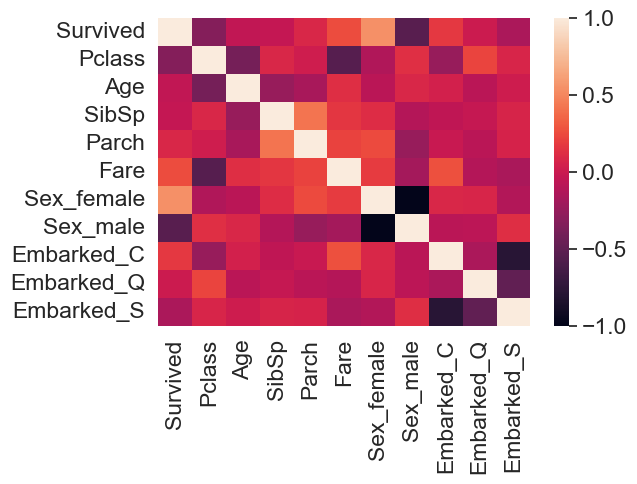

In [38]:
#use heatmap to see whether variables are correlated
plt.figure(figsize = (6,4))
sns.heatmap(df_train_dummied.corr())

In [39]:
#strong correlation between Survived and Sex_Female
#classifier for predicting survivial, creatin train and test datasets using s and y variables

used_features = ["Pclass", "Age", "SibSp", "Parch", "Sex_female", "Sex_male", 
                "Embarked_C", "Embarked_Q", "Embarked_S"]

#ind. and dep. variable
X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']


In [40]:
#splitting dataset as train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [41]:
#checking shape of datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [42]:
#training the classifier by applyting loguistic regression to X_train and y_train
LogReg = LogisticRegression()

In [43]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [44]:
#storing predictions
y_pred = LogReg.predict(X_test)

In [45]:
#confusion matrix to evaluate accuracy of classifier
metrics.confusion_matrix(y_test, y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [46]:
metrics.accuracy_score(y_test, y_pred)

0.8314606741573034

In [47]:
len(X_test)

267

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [50]:
#the algorithm has good precision and recall scores
LogReg.coef_

array([[-1.04163874, -0.03986587, -0.2422568 , -0.04063547,  1.19416522,
        -1.19437504,  0.34963689, -0.03716318, -0.31268353]])

In [51]:
LogReg.intercept_

array([3.65508009])

In [52]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [53]:
#first column = percentage of non-survival
#second column = percentage of survival
LogReg.predict_proba(X_test)

array([[0.26539511, 0.73460489],
       [0.39667099, 0.60332901],
       [0.94737264, 0.05262736],
       [0.25935723, 0.74064277],
       [0.94414769, 0.05585231],
       [0.13501096, 0.86498904],
       [0.33313052, 0.66686948],
       [0.51928471, 0.48071529],
       [0.78162926, 0.21837074],
       [0.40730129, 0.59269871],
       [0.740078  , 0.259922  ],
       [0.2115271 , 0.7884729 ],
       [0.74863888, 0.25136112],
       [0.14570759, 0.85429241],
       [0.86458948, 0.13541052],
       [0.36944547, 0.63055453],
       [0.89363979, 0.10636021],
       [0.29762155, 0.70237845],
       [0.17631797, 0.82368203],
       [0.39886365, 0.60113635],
       [0.90487478, 0.09512522],
       [0.55286479, 0.44713521],
       [0.86434759, 0.13565241],
       [0.93749555, 0.06250445],
       [0.51627591, 0.48372409],
       [0.51584257, 0.48415743],
       [0.03914832, 0.96085168],
       [0.86918929, 0.13081071],
       [0.89806731, 0.10193269],
       [0.32511022, 0.67488978],
       [0.